# 05 Probability

Part of ["Introduction to Data Science" course](https://github.com/kupav/data-sc-intro) by Pavel Kuptsov, [kupav@mail.ru](mailto:kupav@mail.ru)

Recommended reading for this section:

1. Grus, J. (2019). Data Science From Scratch: First Principles with Python (Vol. Second edition). Sebastopol, CA: O’Reilly Media

The following Python modules will be required. Make sure that you have them installed.
- `matplotlib`
- `requests`
- `numpy`
- `scipy`


## Lesson 1

### Uncertainty

Determinism: if we know exact initial conditions of a system we can predict its future states. If there is a small error in the initial condition the prediction error is also small.

Consider a spaceship launch. Given its initial coordinates, its direction and its acceleration engineers are able to predict its trajectory. Since the initial conditions are known with errors and this is unavoidable an actual trajectory will deviate from the predicted one. But due to the determinism a small error in initial conditions result in a small deviation.

Uncertainty: future states of the system can not be predicted with a reasonable precision, no matter how exactly we know the initial condition. 

Weather is an example of uncertainty. No matter how hard we try to measure the initial conditions: air temperature, atmospheric pressure, wind speed and so on. Actual weather conditions will rapidly deviate form the prediction anyway. 

Uncertainty also appears when people's decisions are somehow involved. 

Possible sources of uncertainty

- **Inherent uncertainty.** Quantum mechanics describes the dynamics of subatomic particles as being probabilistic. Weather conditions and people's decisions are also examples of inherent stochasticity.

- **Incomplete observability.** Even deterministic systems can appear stochastic when one cannot observe all of the variables that drive their behavior. When one throws a stone its trajectory endpoint is predictable only if an initial velocity and its angle is registered and a wing is taken into account. It looks stochastic if one can not observe the whole set of the initial conditions.

- **Incomplete modeling.** When the deterministic description requires a huge amount of information one can purposefully discard some information. Although dicing playing cards and tossing a coin are deterministic processes and in principle can be predicted, one usually consider these processes as being stochastic because the prediction is very complicated. 

### Probability. Basic properties

Consider first a deterministic experiment: no matter how many times we repeat it that result is always the same provided that the initial conditions are kept unchanged. 

Let us now turn to a stochastic experiment: even if the initial conditions are unchanged the repeated experiments produce different results. Closer look at the results revels that they belongs to a certain set of possibilities. And it is this set of possibilities that remains unchanged.

For example when we roll a die we know in advance that there are 6 possible outcomes: 1, 2, 3, 4, 5, and 6. But the particular result is random and can not be predicted.

Probability is introduced to quantify the uncertainty. 

A probability of an event $E$ is usually denoted as $P(E)$.

A probability is always a number between 0 and 1. 

Probability 0 means that an event will never occur, and 1 means that the event will surely occur.

If $E$ denotes a certain event, $\bar E$ denotes all others events except this one. The probability of an event not occurring, called the complement: $P(\bar E)=1-P(E)$

Sum of probabilities of all possibilities must be equal to 1. It means that we consider a full set of possibilities: one of them definitely occurs.

Sometimes initial probabilities and the results are represented as percentages: a number in the range from 0 to 100%. Obviously this is done by multiplication of the probability by 100%. 

But notice that all computations are performed for probabilities defined as fractions of 1.

### Postulated probability

There are two ways to define probabilities.

We can assign probabilities to each experiment outcome according to our intuition on the basis of reasonable expectations. 

The simplest and the most reliable case is when we are **equally uncertain** of all possible outcomes. 

This is the case for example for a fair die: there are no reasons to think that some numbers on its edges 
are more preferable then others. 

The same situation is with a fair coin: landing it with a head or a tail on the top are equally uncertain. 

Let the number of all possible outcomes is $N$. Since all of them are equally uncertain we assign to each event a probability 

$$
P=1/N
$$

Such equally uncertain outcomes are called elementary events.

When elementary events have been revealed we can consider more complicated situations that include their combinations.

For example: what is the probability of a fair die landing with an even number on top? 

The probability in this case is computed as a number $n$ of 
the elementary events that fulfill the condition divided by the total number $N$ of the elementary events.

$$
P=n/N
$$

In our example there are 3 even numbers on edges: 2, 4, and 6, and totally there are 6 elementary events. Thus

$$
P=3/6=1/2
$$

This way to introduce the probabilities is also called **classical probability**.

If equally uncertain elementary events cannot be reveled the probabilities can be assigned according to an expert opinion.

For example a doctor believes with 90% certainty that the diagnosis is correct. Thus we assign to this diagnosis a probability

$$
P=0.9
$$

Another example comes from gambling. Probability of results of a competition can be assigned proportional to bets.

The probability defined in this way is also called **subjective or Bayesian probability**.

### Frequentist probability

This is an experimental probability: we repeat a stochastic experiment as many times as possible and count occurrences of each outcome. 

Let the $i$th outcome occurs $m_i$ times in a series of $M$ experiments. Then the frequency of this outcome is

$$
\nu_i = m_i / M
$$

The problem with the frequency is that it is not stable: if we repeat this series of $M$ experiments the frequency will be different.

Let us simulate this experiments numerically. We are going to model a die.

First define a function that counts frequencies. Notice that for practical applications this is not needed since class `Counter` from module `collections` does the same job.

In [ ]:
def freq_prob(seq):
    """
    Assuming that seq is an array of integers, compute frequencies of each number
    """
    prob = {}  # initialize an empty dictionary
    for n in seq:
        try:
            prob[n] += 1  # try to increase the counter
        except KeyError:
            prob[n] = 1   # initialize the counter if this is the first appearance of n
           
    size = len(seq)    
    for n in prob:  # iterate over dict keys
        prob[n] /= size  # compute frequencies
        
    return prob

In [ ]:
# Check it
ser = [1,1,1,2,2]
prob = freq_prob(ser)
print(prob)

Classic definition of probability assign each number on a die the probability 

$$
p=1/6=0.1666\ldots
$$

This value is based on our intuition since each edge of a fair die is expected to appear with equal probabilities. Let us compare it with frequencies.

In [ ]:
import numpy as np

N = 6  # number of die edges and also a range of emerging numbers
M = 10000  # length of the experiment series
rng = np.random.default_rng()

# the first series of experimenst
ser1 = rng.integers(1, N, endpoint=True, size=M)
# the second series of experiments
ser2 = rng.integers(1, N, endpoint=True, size=M)
# the third series of experiments
ser3 = rng.integers(1, N, endpoint=True, size=M)

prob1 = freq_prob(ser1)
prob2 = freq_prob(ser2)
prob3 = freq_prob(ser3)
print(prob1)
print(prob2)
print(prob3)

Observe that the values are close to each other and to $1/6$. But they vary from experiment to experiment. Let us repeat everything with longer series.

In [ ]:
import numpy as np

N = 6 
M = 1000000  # increase it by 100
rng = np.random.default_rng()

ser1 = rng.integers(1, N, endpoint=True, size=M)
ser2 = rng.integers(1, N, endpoint=True, size=M)
ser3 = rng.integers(1, N, endpoint=True, size=M)

prob1 = freq_prob(ser1)
prob2 = freq_prob(ser2)
prob3 = freq_prob(ser3)
print(prob1)
print(prob2)
print(prob3)

The variability is lower but still visible.

This is typical situation: the variability of relative frequencies become small only for really huge series. 

Thus the frequentist probability is defined as a limit of relative frequencies when the length of the series becomes infinite.

$$
P_i = \lim_{M\to\infty} \frac{m_i}{M}
$$

In practice it is usually unclear how to find this limit using strict mathematics. In this case we can guess where the relative frequencies tends. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 6 
M0 = 100
dM = 100
M1 = dM * M0
rng = np.random.default_rng()

# Three series of experiments
ser1 = rng.integers(1, N, endpoint=True, size=M1)
ser2 = rng.integers(1, N, endpoint=True, size=M1)
ser3 = rng.integers(1, N, endpoint=True, size=M1)

# Collect frequencies computed for different series lengths
data1, data2, data3 = [], [], []
for Mx in range(M0, M1+1, dM):
    prob1 = freq_prob(ser1[:Mx])
    prob2 = freq_prob(ser2[:Mx])
    prob3 = freq_prob(ser3[:Mx])
    data1.append([Mx, prob1[1]])
    data2.append([Mx, prob2[1]])
    data3.append([Mx, prob3[1]])
    
# Convert lists to numpy arrays for convenience
data1 = np.array(data1)
data2 = np.array(data2)
data3 = np.array(data3)

fig, ax = plt.subplots()

ax.plot(data1[:, 0], data1[:, 1], label='ser1')
ax.plot(data2[:, 0], data2[:, 1], label='ser2')
ax.plot(data3[:, 0], data3[:, 1], label='ser3')
ax.axhline(1/6, color='k', linestyle='--', label='prob')
ax.set_xlabel(r'$M$')
ax.grid()
ax.legend();

Plots demonstrate that the frequencies approach classic probability $1/6$ very slowly. 

### Independent random events and joint probability

Usually compound events are considered that include two or more simple events. 

These simple events can be independent or can depend on each other.

Probabilities of particular events are called marginal probabilities.

Consider two dice. We roll them and expect that both land with 1 on top. What is the probability? 

In this situation we have two events, $A$ and $B$. Probability that they occur simultaneously is called *joint probability* and is denoted as $P(A,B)$.

The joint probability is different for independent and dependent events.

Independent events $A$ and $B$: probability $P(B)$ of the event $B$ is not changed whether or not the event $A$ occurs.

Landing of dice with 1 on top are independent events. Both have probabilities $P(A)=P(B)=1/6$.



The joint probability of two independent events is a product of their probabilities:

$$
P(A,B) = P(A) P(B)
$$

For two dice the joint probability for 1 to show up is

$$
P(A, B) = \frac{1}{6}\times\frac{1}{6}=\frac{1}{36}
$$

### Dependent random events and conditional probability

Two events $A$ and $B$ are dependent if knowing something about whether $A$ occurs gives us information about whether $B$ occurs and vice versa.

In the other words, if the events $A$ and $B$ are dependent the probability $P(B)$ varies depending on whether the event $A$ occurs or not.

Consider a box with 4 red 8 blue balls. Totally there are 12 balls.



The event $A$: we take blindly a red ball and do not return it back to the box. It means we *want to get a red ball*. But we do it blindly and the result can be $A$ (the ball was red) or $\bar A$ (that was blue).

The probability of $A$ is $P(A)=4/12=1/3$ (according to classical definition of probability).

The event $B$: when the first ball is taken we want to take blindly another red ball. The probability of $B$ depends on the result of the first experiment: was the first ball red (event $A$ has occurred) or it was blue (event $\bar A$ has occurred).

Assume the event A has occurred, i.e., we indeed took a red ball.



There are 11 balls left in the box: 3 red and 8 blue ones. 

Thus the probability of $B$ provided that $A$ has occurred is

$$
P(B|A) = 3/11
$$

$P(B|A)$ is called *conditional probability*.

Now assume that the event $\bar A$ has occurred: that first ball was not red.



Again there are 11 balls in the box, but now 4 red and 7 blue ones.

The probability of $B$ provided that $\bar A$ has occurred is

$$
P(B|\bar A) = 4/11
$$

The joint probability of two dependent events is a product of the probability of the first event $P(A)$ and conditional probability of $B$ provided that $A$ has occurred $P(B|A)$:

$$
P(A, B) = P(B|A) P(A)
$$

### Compound events

Assume that we are given two closed boxes. Each one can be either empty or contain a gift. The boxes and the gifts are identical. 

Let $A$ be an event that the box 1 contains a gift, and $B$ means that the box 2 has a gift. 

The presence or absence of the gift in one box is independent on the content of the other box, i.e., the events $A$ and $B$ are independent.



Since the content of the boxes is uncertain as much as possible we assign both probabilities as follows:

$$
P(A)=P(B)=1/2
$$

If we open two boxes, the following events can occur:
- No gifts: $\bar A$ and $\bar B$
- Two gifts: $A$ and $B$
- A gift in the box 1: $A$ and $\bar B$
- A gift in the box 2: $\bar A$ and $B$



All these events have equal probabilities $1/4$:

$$
P(\bar A, \bar B) = P(A, B) = P(A, \bar B) = P(\bar A, B) = 1/4
$$

If we are interested in the number of the gifts, no matter where they were found, the events and the probabilities are as follows.

- No gifts: $G_0=\bar A\text{ and }\bar B$
- Two gifts: $G_2=A\text{ and }B$
- One gift: $G_1=(A\text{ and }\bar B)\text{ or }(\bar A\text{ and }B)$

$$
P(G_0)=1/4, 
$$

$$
P(G_2)=1/4, 
$$

$$
P(G_1)=2/4=1/2
$$

The probability to have *at least one* gift $G_{>0}$ can found like this:

$$
P(G_{>0})=P(\bar G_0)=1-1/4=3/4 
$$

### Reconsider probabilities using new information

How the probability of $G_2$ changes if we obtain new information?

What is the probability to have two gifts if the box 2 is already open and contains the gift? 

This is a conditional probability: we want to know the probability of $G_2$ provided that $B$ has occurred: $P(G_2|B)$.

Above we have found unconditional probability of $G_2$: there are four possibilities and only one corresponds to $G_2$. Hence $P(G_2)=1/4$. 

But if $B$ has occurred only two possibilities remain, see the right column of the figure. Two cases shown there represent gifts in the box 2.



Among them the top right one corresponds to the event $G_2$: both boxes contain the gifts. Thus one case of two fulfills the condition and hence the sought probability reads

$$
P(G_2|B) = 1/2
$$

Bearing in mind more complicated problems we consider now a  formal solution of the problem.

Let us first remember: if the event $G_2$ depends on $B$ so that $P(G_2|B)$ is the conditional probability of $G_2$ provided that $B$ has occurred, then the joint probability $P(G_2,B)$ is computed as follows:

$$
P(G_2, B) = P(G_2|B) P(B)
$$

where $P(B)$ is the unconditional probability of $B$. 

Thus we can find the conditional probability $P(G_2|B)$ as

$$
P(G_2|B) = P(G_2,B) / P(B)
$$

The joint probability $P(G_2, B)$ means: both boxes contain the gifts ($G_2$) and the box 2 contains the gift ($B$). 

It is clear that the first event implies the second one. Thus

$$
P(G_2, B) = P(G_2) = 1/4
$$

Also we know that

$$
P(B)=1/2
$$

Finally we have

$$
P(G_2|B)=\frac{1/4}{1/2}=\frac{2}{4}=\frac{1}{2}
$$

Consider another situation. 

What is the probability to have two gifts if at least one of the boxes contains a gift?



In the other words new information allows to exclude the case with two empty boxes.

Inspecting the figure we see that there are now three possibilities and only one of them fulfills the conditions. Thus the answer is

$$
P(G_2|G_{>0}) = 1/3
$$

Now let us fund the answer via a formal approach. 

$$
P(G_2|G_{>0}) = P(G_2, G_{>0}) / P(G_{>0})
$$

The joint probability $P(G_2, G_{>0})$ means: two boxes contain the gifts ($G_2$) and at least on of the boxes contain the gift ($G_{>0}$). The first event implies the second one, so

$$
P(G_2, G_{>0}) = P(G_2) = 1/4
$$

Above we already have found that $P(G_{>0}) = 3/4$. 

Thus we have again the answer:

$$
P(G_2|G_{>0}) = \frac{1/4}{3/4} = \frac{4}{4\cdot 3} = \frac{1}{3}
$$


### Law of total probability

Sometimes we know conditional probabilities and want to find marginal probability. 

This is computed via law of total probability.

Assume we have envelopes of two colors: red and blue. 

If we take a red envelope this is an event $A$ and blue envelope in hands is an event $B$.

Envelopes can contain gifts and the gifts are placed in a random way. The probability depends on the color. 

Red envelopes are filled with the probability $P(G|A)$, blue ones hold it with the probability $P(G|B)$.

For concreteness, let

$$
P(G|A) = 0.2, P(G|B)=0.6
$$



Notice that the probabilities are conditional because they depend on the color of an envelope.

Now we take a certain number of blue and red envelopes and put them into a box.



The question is: What is the marginal probability $P(G)$ to have a gift if a pulling up of an envelope occurs blindly, i.e., without knowing a color an advance?

The answer is given by a law of total probability.

Let the probability to have a red envelope is $P(A)$ and $P(B)$ is the probability to have a blue one.

In the figure there are totally 9 envelopes including 4 red ones and 5 blue ones. Thus

$$
P(A) = 4/9, P(B) = 5/9
$$

Now we are ready to compute $P(G)$.

We will have a gift (event $G$) if we take a red enveloped with the gift (the joint events $G$ and $A$) or a blue envelope with the gift (the joint events $G$ and $B$).

The corresponding probabilities are

$$
P(G) = P(G,A) + P(G,B)
$$

Since the event $G$ depends on $A$ and $B$ we compute the joint probabilities via conditional probabilities:

$$
P(G,A)=P(G|A) P(A), 
P(G,B)=P(G|B) P(B)
$$

Gathering all together we obtain the *law of total probability*:

$$
P(G) = P(G|A) P(A) + P(G|B) P(B)
$$

For our particular example

$$
P(G) = 0.2 \cdot 4/9 + 0.6 \cdot 5/9 \approx 0.42
$$


### Bayes' theorem

Bayes' theorem is based on the fact that if a random event $A$ depends on $B$ this dependence is mutual and one can also consider how $B$ depends on $A$.

This theorem allows to reverse conditional probabilities: Given $P(A|B)$ we can compute $P(B|A)$.

Another description of this theorem: it allows to reconsider probabilities using new information. 

In fact it was done already above: we computed the probability to have two gifts from two boxes provided that some new information had appeared.

First discuss this theorem formally.

Consider two dependent events $A$ and $B$. They occur simultaneously with the joint probability $P(A,B)$. It can be found via conditional probabilities as follows:

$$
P(A, B) = P(B | A) P(A) = P(A | B) P(B)
$$

Assume we know $P(A | B)$ and want to find $P(B | A)$. It is found via Bayes' theorem:

$$
P(B | A) = \frac{P(A | B) P(B)}{P(A)}
$$

If the marginal probability $P(A)$ is unknown in advance, it can be found via the law of total probability.

$$
P(A) = P(A | B) P(B) + P(A | \bar B) P(\bar B)
$$

Gathering these equations together we obtain more detailed form of Bayes' theorem:

$$
P(B | A) = \frac{P(A | B) P(B)}{P(A | B) P(B) + P(A | \bar B) P(\bar B)}
$$

Consider an example of using Bayes' theorem.

Imagine a certain disease that affects 1 in ever 10000 people.



It means that the probability to encounter an ill person is 

$$
P(D)=1/10000,
$$

and healthy persons have probability 

$$
P(\bar D) =  1 - P(D) = 9999 / 10000
$$

Assume that there is a test for this disease that gives the correct result for a diseased person, i.e., true positive result, with the probability

$$
P(T | D) = 0.99
$$

The false negative result is the complement (diseased person is tested as healthy):

$$
P(\bar T | D) = 1 - P(T | D) = 0.01
$$

Also assume that when this test is applied to a healthy person it produces the true negative result with the probability

$$
P(\bar T | \bar D) = 0.98
$$

Its complement is the false negative result (healthy person is tested as diseased):

$$
P(T | \bar D) = 1 - P(\bar T | \bar D) = 0.02
$$

To summarize: probabilities of true positive $P(T | D)$ and true negative $P(\bar T|\bar D)$ events are characteristic of the test system obtained after its approbation. 



Two other probabilities for false positive and false negative events are computed as complements according to a general property of probability.

Now we start using this test system and it produces a certain amount of positive and negative results. 

The first reasonable question is: What is the probability that a person with a positive test (event $T$) has a disease (event $D$)?

This is the conditional probability $P(D|T)$ and it can be computed via Bayes' theorem equation.

$$
P(D|T) = \frac{P(T|D) P(D)}{P(T|D) P(D) + P(T|\bar D) P(\bar D)}
$$

The second question: Given a negative test (event $\bar T$) what is the probability the person is healthy (event $\bar D$)?

$$
P(\bar D|\bar T) = \frac{P(\bar T|\bar D) P(\bar D)}
{P(\bar T|\bar D) P(\bar D) + P(\bar T| D) P(D)}
$$

In [1]:
# Compute these probabilities 
P_D = 1/10000
P_T_D = 0.99
P_notT_notD = 0.98

P_notD = 1 - P_D
P_T_notD = 1 - P_notT_notD
P_notT_D = 1-P_T_D

P_D_T = P_T_D * P_D / (P_T_D * P_D + P_T_notD * P_notD)
P_notD_notT = P_notT_notD * P_notD / (P_notT_notD * P_notD + P_notT_D * P_D)

print(f"Positively tested person is diseased with the probability {P_D_T*100:.2f}% and is healthy with the probability {(1-P_D_T)*100:.2f}%")
print(f"Negatively tested person is healty with the probability {P_notD_notT*100}% and is diseased with the probability {100-P_notD_notT*100}%")

Positively tested person is diseased with the probability 0.49% and is healthy with the probability 99.51%
Negatively tested person is healty with the probability 99.99989794908272% and is diseased with the probability 0.00010205091727755189%


The obtained results are very optimistic for patients and pessimistic for test system developers. 

If the test is negative the patient is most likely not diseased, and  if the test is positive the patient is also most likely not diseased.

Also we observe that a value of test systems is highly overestimated.

### Numerical verification of the Bayes' theorem

The results do not agree well with our intuition. Let us check them in a straightforward way.

But first we need to discuss some computational ideas

In [2]:
# Genertae random floats in the range [0, 1)
import numpy as np
rng = np.random.default_rng() 

for _ in range(10):
    print(rng.random())

0.5438908670153522
0.3343438312264413
0.19911032528940198
0.4543041744518159
0.4029002871967847
0.5876456988598526
0.7767006278984869
0.07285280900308722
0.9607378296712513
0.6113120890468041


In [3]:
# Generate 0 and 1 with a given probability
import numpy as np
rng = np.random.default_rng() 

prob = 0.8

seq = [1 if rng.random() < prob else 0 for _ in range(100)]
print(seq)

# Estimate probability via frequency - must be close to prob
print("prob=", sum(seq) / len(seq))

[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
prob= 0.79


Now let us construct the model

In [4]:
import numpy as np
rng = np.random.default_rng()

class Test:
    """
    This is the test system
    """
    def __init__(self, rng, P_T_D, P_notT_notD):
        self.P_T_D = P_T_D
        self.P_notT_notD = P_notT_notD
        self.rng = rng

    def __call__(self, person):
        # Generate result depending on the person status
        assert person == 0 or person == 1
        r = rng.random()
        if person == 1:
            # for diseased person returns 1 with probability P_T_D
            return 1 if r < self.P_T_D else 0
        else:
            # for healthy person returns 0 with probability P_notT_notD
            return 0 if r < self.P_notT_notD else 1

P_D = 1/10000        
P_T_D = 0.99
P_notT_notD = 0.98
size = 1000000

# This is our population with healthy (0) and diseased (1) persons
pop = [1 if rng.random() < P_D else 0 for _ in range(size)]

# Create test system
test = Test(rng, P_T_D, P_notT_notD)

# Results of tests
results = [test(p) for p in pop]

In [6]:
# Run along population and select persons with positive tests
pos_results = [p for r, p in zip(results, pop) if r == 1]

# Estimate P_D_T - probability that persons with positive test is diseased
est_P_D_T = sum(pos_results) / len(pos_results)
print(f"Estimated P_D_T={est_P_D_T*100:.2f}%, True P_D_T={P_D_T*100:.2f}%")

Estimated P_D_T=0.41%, True P_D_T=0.49%


In [7]:
# Run along population and select persons with negative tests
neg_results = [p for r, p in zip(results, pop) if r == 0]

# Estimate P_notD_notT - probability that persons with negative test is healthy
est_P_notD_notT = (len(neg_results) - sum(neg_results)) / len(neg_results)
print(f"Estimated P_notD_notT={est_P_notD_notT*100}%, True P_notD_notT={P_notD_notT*100}%")

Estimated P_notD_notT=100.0%, True P_notD_notT=99.99989794908272%


Observe that our computed results are very close to theoretically predicted via Bayes' theorem.

### Exercises

1\. Rolling two dice find the probability that they land with an even sum of points on top and at least one die has six points.

2\. Consider a game where your score is the maximum value from two dice. Compute the probability of each event from 1 to 6.

3\. File "abc_freq.txt" that you can find at "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/" contains a comma separated sequence of symbols 'a', 'b', and 'c'. Write the program that downloads this file and converts it to a list of symbols. Then the program computes frequencies of the symbols and represent them as percentages. Correct resulting values will be integer. If not, you probably forget to remove newline symbols from the file.

4\. In this exercise you will estimate how smoking is related with some (imaginary) disease $D$. Imagine that 0.1% of the population have this disease. Also it is known that there are 13% of smoker in the population. Finally 30% of the diseased people smoke. Given this data draw a conclusion do smoking provoke the disease? To answer it find the percentage of the smokers that have this disease and then compare it with the marginal percentage of the diseased people. 

## Lesson 2

### Random variables

A variable is random when each reading its value results in different values.

Given a random variable we can not predict each its particular value. But we know a range of possible values and probabilities of each value. 

A complete set of probabilities describing appearance of each value is called a probability distribution.

Visual representation of the probability distribution is a histogram.

This is just a simple illustration:

In [8]:
import numpy as np

size = 10000
n1 = 1000
n2 = 500
n3 = 1500
n4 = 4000
n5 = size - (n1 + n2 + n3 + n4)

# Create a sequence with a given number of values
data = [10] * n1 + [20] * n2 + [30] * n3 + [40] * n4 + [50] * n5

# Set of possible values
print("Set of possible values", set(data))

# Shuffle the data - obtain a random sequence
rng = np.random.default_rng()
rng.shuffle(data)
print("Data sample", data[:100])

Set of possible values {40, 10, 50, 20, 30}
Data sample [10, 50, 30, 40, 40, 30, 40, 50, 10, 50, 40, 50, 50, 30, 20, 10, 40, 40, 50, 40, 30, 50, 50, 50, 50, 20, 40, 50, 20, 40, 40, 50, 40, 40, 40, 10, 50, 40, 40, 40, 40, 40, 30, 50, 20, 40, 30, 20, 40, 40, 30, 40, 30, 40, 40, 50, 30, 10, 50, 30, 50, 50, 30, 50, 50, 50, 50, 50, 30, 40, 40, 30, 40, 50, 50, 50, 40, 40, 40, 40, 40, 10, 50, 20, 30, 30, 20, 30, 30, 50, 40, 40, 50, 40, 40, 10, 10, 50, 50, 50]


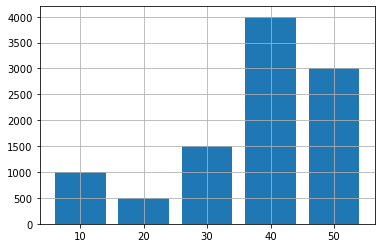

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Edges of bins
bin_edges = [5,15,25,35,45,55]

ax.hist(data, bins=bin_edges, rwidth=0.8)
ax.grid();

### Discrete and continuous random variables

Data in the example above can be considered as a record of multiple readings of a random variable. 

Its possible vales belong to a finite set of integers. 

Such random variable is called discrete.

Continuous random variable has a continuum of outcomes.

Examples from a real world: wind speed or traffic rate during a day. These values are recorded as real numbers and can have any values within certain range.

Numerical example: random number generator that produces real numbers between 0 and 1.

*The important point* about random values expressed as real numbers: since there are infinitely many real numbers each particular number, say $\pi/4$, has *a vanishing probability*. 

It doesn't make any sense to speak about probabilities of any particular real number. This is zero. Instead it is reasonable to consider a probability for the number to fall within some range of values.

### Probability density function

Distribution of probabilities of a continuous variable is described with a probability *density* function (PDF). Usually we will denote it as $\rho(X)$. 

Word *density* here means that if we want to have a probability itself we must multiply the density by the range width.

The probability for $x$ to have a value between $X$ and $X+h$ is equal to

$$
P(x\in [X, X+h])=\rho(X) h
$$

Actually this is more or less correct when $h$ is very small. 

Speaking more strictly the probability of seeing a value from a certain interval equals to an area under the corresponding fragment of the PDF curve. 

The area in turn is computed as an integral of $\rho(X)$:

<br>

$$
P(x\in [X, X+h])=\int_{X}^{X+h} \rho(x) dx
$$



The area under the whole curve is always 1. 

$$
\int_{-\infty}^{\infty} \rho(x) dx = 1
$$

This property is called normalization.

### Cumulative distribution function

In addition to PDF the cumulative distribution function
(CDF) is considered. It gives the probability that a random variable $x$ is less than or equal to a certain value $X$. 

$$
P(x\leq X) = \phi(X)
$$



The complement to CDF is the probability that a random variable $x$ is above $X$:

$$
P(x>X) = 1 - \phi(X)
$$



Thus the probability to find $x$ between $X$ and $X+h$ equals

$$
P(x\in [X, X+h])=\phi(X+h) - \phi(X)
$$

<br>



CDF is computed via PDF as follows

$$
\phi(x)=\int_{-\infty}^{x} \rho(\xi) d \xi
$$

Given CDF we compute PDF as

$$
\rho(x) = \frac{d \phi(x)}{dx}
$$

### Uniform distribution

Real numbers between 0 and 1 are generated with equal probabilities.

Equations for the uniform PDF:

$$
\rho(x) = 
\begin{cases}
0 & \text{if $x<0$} \\
1 & \text{if $0\leq x< 1$} \\
0 & \text{if $x\geq 1$}
\end{cases}
$$

and the corresponding CDF:

$$
\phi(x) = 
\begin{cases}
0 & \text{if $x<0$} \\
x & \text{if $0\leq x< 1$} \\
1 & \text{if $x\geq 1$}
\end{cases}
$$

To show their graphs let us first define corresponding Python functions:

In [10]:
def unif_pdf(x):
    """PDF for uniform distribution"""
    if x < 0:
        return 0
    elif x <= 1:
        return 1
    else:
        return 0
    
def unif_cdf(x):
    """CDF for uniform distribution"""
    if x < 0:
        return 0
    elif x <= 1:
        return x
    else:
        return 1

And now we can plot the graphs:

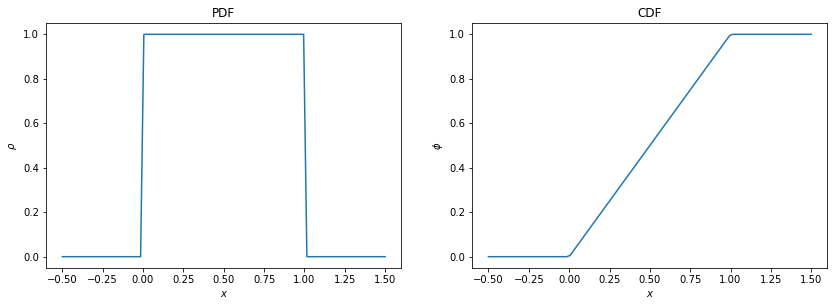

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.5))

x = np.linspace(-0.5, 1.5, 100)
y_pdf = [unif_pdf(xi) for xi in x]
y_cdf = [unif_cdf(xi) for xi in x]

axs[0].plot(x, y_pdf)
axs[1].plot(x, y_cdf)

axs[0].set_title("PDF")
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\rho$')

axs[1].set_title("CDF")
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\phi$');

Given an experimental dataset its PDF can be estimated via histogram. 

Let us first recall how we can generate random numbers with uniform distribution between 0 and 1:

In [12]:
import numpy as np

# This object is a random number generator
rng = np.random.default_rng()

# This method of the generator models a random variable with a uniform distribution from 0 to 1.
print(rng.random())

0.8107557480580956


Let us now generate a dataset of uniformly distributed random values and visualize its PDF using a histogram.

Notice an option `density=True` that triggers normalization of bin heights to obtain histogram approximation of PDF. 

Size of dataset and number of bins influences a quality of PDF approximation.

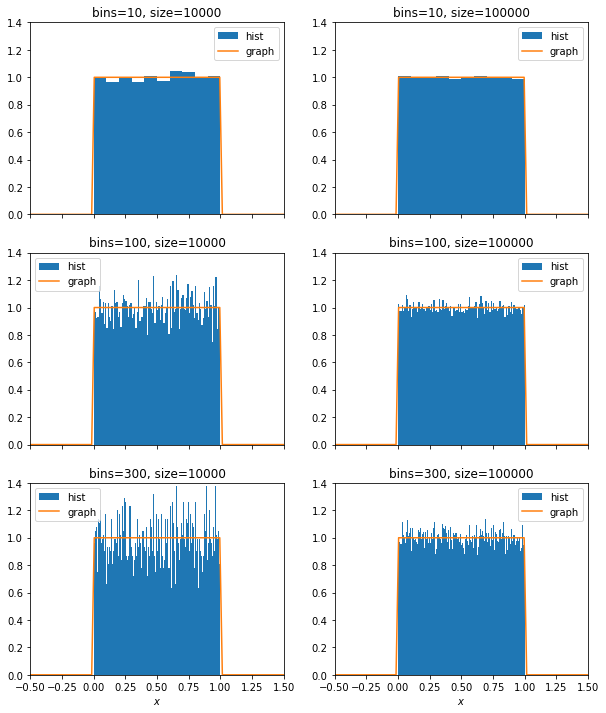

In [13]:
import matplotlib.pyplot as plt

full_size = 100000
shrt_size = full_size // 10
nbins = [10, 100, 300]

data = rng.random(size=full_size)

x = np.linspace(-0.5, 1.5, 100)
y_pdf = [unif_pdf(xi) for xi in x]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=True)

# Left column is plotted for shorter dataset
ax_col = axs[:, 0]
for ax, b in zip(ax_col, nbins):
    ax.hist(data[:shrt_size], bins=b, density=True, label="hist")
    ax.plot(x, y_pdf, label="graph")
    ax.set_title(f"bins={b}, size={shrt_size}")
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 1.4])
    ax.legend()
    
ax_col[-1].set_xlabel(r'$x$');

# Right column is plotted for the full dataset
ax_col = axs[:, 1]
for ax, b in zip(ax_col, nbins):
    ax.hist(data, bins=b, density=True, label="hist")
    ax.plot(x, y_pdf, label="graph")
    ax.set_title(f"bins={b}, size={full_size}")
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 1.4])
    ax.legend()
    
ax_col[-1].set_xlabel(r'$x$');    

Using larger number of bins we see finer structure of the PDF. 

Size of the dataset impacts upon this structure. The PDF looks more similar to the theoretical one for larger dataset.

To plot the cumulative histogram that approximates CDF we use an option `cumulative=True`.

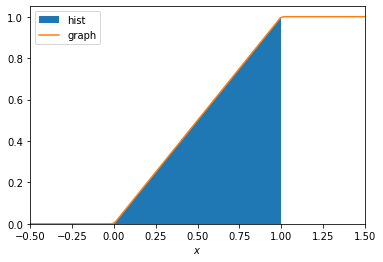

In [14]:
import matplotlib.pyplot as plt

full_size = 100000
data = rng.random(size=full_size)

x = np.linspace(-0.5, 1.5, 100)
y_cdf = [unif_cdf(xi) for xi in x]

fig, ax = plt.subplots()

ax.hist(data, bins=300, density=True, cumulative=True, label="hist")
ax.plot(x, y_cdf, label="graph")
ax.set_xlim([-0.5, 1.5])
ax.legend()
ax.set_xlabel(r'$x$');

Observe that the cumulative histogram is less affected by finite size effects.

### The normal distribution

The normal distribution is also called Gaussian distribution. It has bell or hump shape and is completely determined by two parameters: its mean $\mu$ and its standard deviation $\sigma$.

The mean determines where the distribution is centered, and the standard deviation indicates its width.

The PDF for this distribution:

$$
\rho(x)=\frac{1}{\sigma\sqrt{2\pi}}\mathrm{exp}
\left(
-\frac{(x-\mu)^2}{2\sigma^2}
\right)
$$

The corresponding CDF can not be written via elementary functions:

$$
\phi(x)=\frac{1}{2}
\left[
1+\mathrm{erf}
\left(
\frac{x-\mu}{\sigma\sqrt{2}}
\right)
\right]
$$

where $\mathrm{erf}$ is called Gauss error function.

When $\mu=0$ and $\sigma=1$ the distribution is called the standard normal distribution.

If $S$ is a random variable with standard normal distribution, then it turns out that 

$$
X = \sigma S + \mu
$$

is also a random variable with normal distribution but with mean $\mu$ and standard deviation $\sigma$.

Below are examples of PDF's, CFD's for normal distribution.

Observe how $\sigma$ controls the width of the bell-shaped PDF curves.

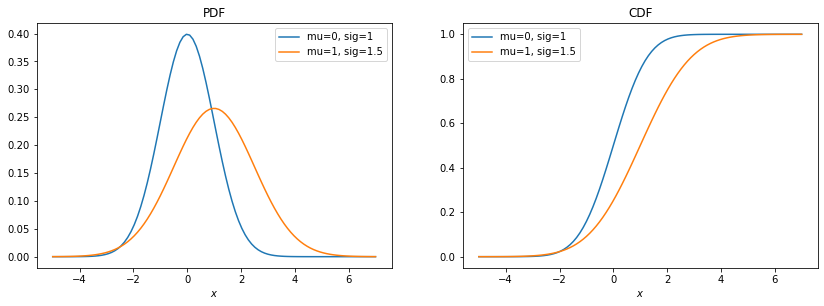

In [15]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

def norm_pdf(x, mu, sig):
    """Normal probability density function"""
    return np.exp(-(x-mu)**2 / (2*sig*sig)) / (sig * np.sqrt(2*np.pi))

def norm_cdf(x, mu, sig):
    """Normal cumulative distribution function"""
    return 0.5 * (1 + erf((x-mu)/(sig*np.sqrt(2))))

mu1, sig1 = 0, 1
mu2, sig2 = 1, 1.5

x = np.linspace(-5, 7, 100)

y1_pdf = [norm_pdf(xi, mu1, sig1) for xi in x]
y1_cdf = [norm_cdf(xi, mu1, sig1) for xi in x]

y2_pdf = [norm_pdf(xi, mu2, sig2) for xi in x]
y2_cdf = [norm_cdf(xi, mu2, sig2) for xi in x]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.5))

axs[0].plot(x, y1_pdf, label=f"mu={mu1}, sig={sig1}")
axs[0].plot(x, y2_pdf, label=f"mu={mu2}, sig={sig2}")
axs[0].set_title("PDF")

axs[1].plot(x, y1_cdf, label=f"mu={mu1}, sig={sig1}")
axs[1].plot(x, y2_cdf, label=f"mu={mu2}, sig={sig2}")
axs[1].set_title("CDF")

for ax in axs.reshape(-1):
    ax.set_xlabel(r'$x$')
    ax.legend()

Here is an example of a histogram obtained for numerical datasets.

Notice that random numbers with normal distribution can be generated with the method `normal` of the random number generator.

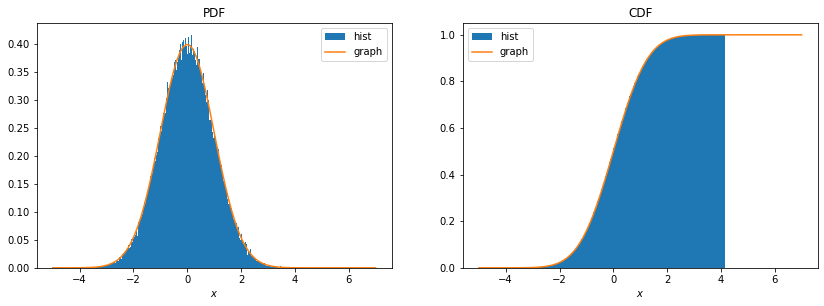

In [16]:
size = 100000
nbins = 300

rng = np.random.default_rng()

# Random data with standard normal distribution
data1 = rng.normal(loc=mu1, scale=sig1, size=size)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.5))

axs[0].hist(data1, bins=nbins, density=True, label="hist")
axs[0].plot(x, y1_pdf, label="graph")
axs[0].set_title("PDF")

axs[1].hist(data1, bins=nbins, density=True, cumulative=True, label="hist")
axs[1].plot(x, y1_cdf, label="graph")
axs[1].set_title("CDF")

for ax in axs.reshape(-1):
    ax.set_xlabel(r'$x$')
    ax.legend()

Unlike the theoretical curve the cumulative histogram has a cutoff. This is finale size effect. Increasing the size of the dataset shifts the cutoff to the right.

### The central limit theorem

The reason why the distribution is called normal is the central limit theorem.

Consider $n$ random variables $x_1$, $x_2$, ... , $x_n$. Assume that all of them are independent or almost independent. 

Also assume that all of them have more or less similar ranges of variation. It means that no one of them dominates.

Define a new random variable

$$
z_n = \frac{1}{n}(x_1+x_2+\cdots+x_n)
$$

The central limit theorem says that $z_n$ is approximately normally distributed. 

The larger number $n$ of the averaged random values the closer the distribution to the normal.

### Bernoulli random variables
Bernoulli random variable is a discrete random variable with two outcomes: "fail" (0) or "success" (1). The probability of the success equals to $p$ and the probability of the fail is $1-p$.

The fair coin, i.e., the coin that lands with heads or tails with the probability $p=0.5$ is an example of a Bernoulli variable. 

One can also imagine a biased coin that lands with heads with the probability $p\in [0,1]$. It will be another, more general example of the Bernoulli variable.

The mean and the standard deviation of a Bernoulli variable is, respectively,

$$
\mu=p, \; \sigma=\sqrt{p(1-p)}
$$

### The binomial distribution

Let us now consider a series of $n$ tossing of a biased coin and count a number of heads $B$. 

In the other words we have $n$ independent Bernoulli variables each having the probability $p$ and are interested in the number of successes $B$.

This number $B$ is a random integer between 0 and $n$. 

The distribution of $B$ is called the binomial distribution:

$$
P(B=k) = 
\binom{n}{k} p^{k}(1-p)^{n-k}
$$

Here $k$ is an integer between 0 and $n$. The multiplier $\binom{n}{k}$ is called binomial coefficient:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

According to the central limit theorem the binomial distribution with sufficiently large $n$ will be close to the normal distribution with 

$$
\mu=np,\; \sigma=\sqrt{np(1-p)}
$$

Let us check it. Observe that we compute binomial coefficients using the function `binom` from `scipy.special`.

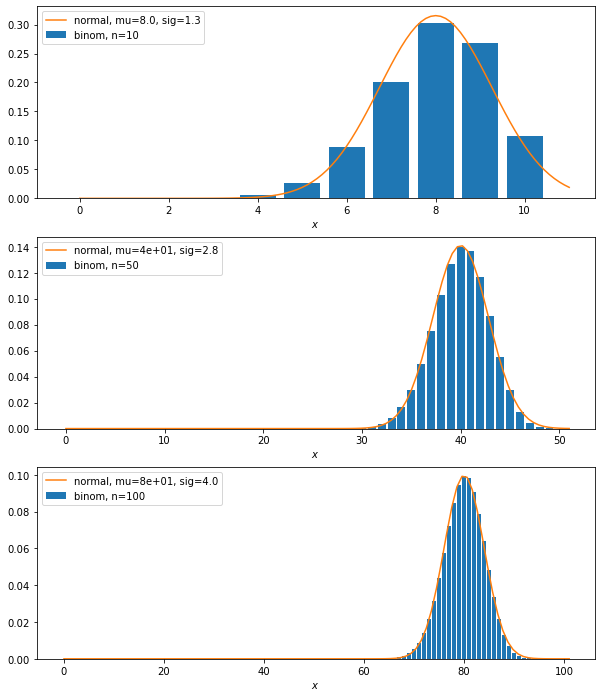

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

def norm_pdf(x, mu, sig):
    return np.exp(-(x-mu)**2 / (2*sig*sig)) / (sig * np.sqrt(2*np.pi))

def binom_distr(n, k, p):
    """Binomial distribution"""
    return binom(n, k) * p**k * (1-p)**(n-k)
    
p = 0.8
ns = [10, 50, 100]    

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for ax, n in zip(axs, ns):
    k = np.arange(n+1)
    b = [binom_distr(n, ki, p) for ki in k]
    mu = n * p
    sig = np.sqrt(n * p * (1 - p))
    x = np.linspace(0, n+1, 100)
    y = [norm_pdf(xi, mu, sig) for xi in x]
    ax.bar(k, b, color="C0", label=f"binom, n={n}")
    ax.plot(x, y, color="C1", label=f"normal, mu={mu:.2}, sig={sig:.2}")
    ax.legend()
    ax.set_xlabel(r'$x$')


### Exponential function

An exponential function reads

$$
y = b^x
$$

where b is a positive real number not equal to 1.

Most often the constant called Euler number $e=2.71828\ldots$ is used as the base for the exponential function. 

If not specified the exponential function with the base $e$ is assumed.

$$
y=e^x=\mathrm{exp}(x)
$$

Below is the graph of the exponential function.

Observe that the exponential function grows very fast.

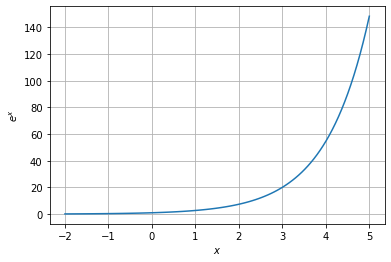

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 5, 100)
y = np.exp(x)

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$e^x$")
ax.grid();

Properties of the exponential function:

$$
e^x > 0 \text{ for any $x$}
$$

$$
e^0=1
$$

$$
e^x<1 \text{ for x < 0}
$$

$$
e^x>1 \text{ for x > 0}
$$

$$
e^{a+b}=e^a\cdot e^b
$$

$$
(e^a)^b = e^{a\cdot b}
$$


### Logarithm

Logarithmic function is the inverse for the exponential function. 

If $y$ is computed as the exponential of $x$

$$
y=b^x
$$

then we can find $x$ using the logarithm:

$$
x=\log_b y
$$

Here $b$ is called the logarithm base.

Most often three bases are used: 2, 10 and $e$:

$$
\log_{10} x, \;
\log_{2} x, \;
\log_{e} x
$$

In the last case the base $e$ is usually omitted. 

The logarithm to the base $e$ is called natural:

$$
y = e^x\;\Rightarrow x=\log y
$$

If not specified the natural logarithm is assumed. 

Graph of the logarithmic function.

Observe that the logarithm is the slowest elementary function.

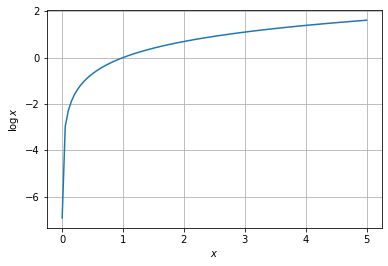

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1e-3, 5, 100)
y = np.log(x)

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\log x$")
ax.grid();

Properties of the logarithmic function:

$$
y=\log x \text{ only for $x>0$}
$$

$$
\log 1 = 0
$$

$$
\log x < 0 \text{ for x < 1}
$$

$$
\log x > 0 \text{ for x > 1}
$$

$$
\log a\cdot b = \log a + \log b
$$

$$
\log a / b = \log a - \log b
$$

$$
\log a^p = p \log a
$$


### Information amount

In this section for the sake of simplicity we will always consider only discrete random variables.

Dealing with a random variable we never know its next value. Thus when we obtain it we obtain some new information. 

How to measure an amount of this information?

The basic intuition here is that learning that an unlikely event has occurred is more informative than learning that a likely event has occurred. 

A message saying "the sun rose this morning" is so uninformative as to be unnecessary to send, but a message saying "there was a solar eclipse this morning" is very informative.

We would like to quantify information in a way that formalizes this intuition.

- Likely events should have low information content, and in the extreme case, events that are guaranteed to happen should have no information content whatsoever.

- Less likely events should have higher information content.

- Independent events should have additive information. For example, finding out that a tossed coin has come up as heads twice should convey twice as much information as finding out that a tossed coin has come up as heads once.

These three properties are satisfied if we define the particular information of an event as

$$
I(x) = - \log P(x)
$$

Here we assume that $\log$ is the natural logarithm, with base $e$. 

Below observe a graph of $I(x)$:

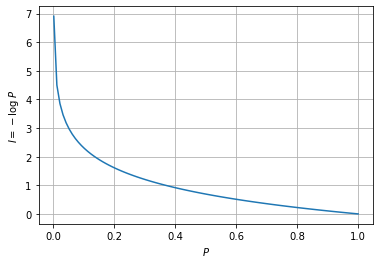

In [20]:
import numpy as np
import matplotlib.pyplot as plt

P = np.linspace(1e-3, 1, 100)
I = -np.log(P)

fig, ax = plt.subplots()

ax.plot(P, I)
ax.set_xlabel(r"$P$")
ax.set_ylabel(r"$I=-\log \, P$")
ax.grid();

Let us discuss how the above items are fulfilled with $I(x)$.

- Likely events have probability close to 1. We observe that when $P\to 1$ the graph approaches zero, $I\to 0$.

- Less likely events have vanishing probability. We observe that when $P\to 0$ the information grows, $I\to\infty$.

- Probability of two independent events is the product of their marginal probabilities: $P(x,y) = P(x) P(y)$. Thus 

$$
I(x,y)=-\log P(x,y) = -\log P(x) - \log P(y) = I(x) + I(y)
$$


### The Shanon entropy

Assume that we have a random variable $x$ with $n$ possible outcomes 
$x_i$ ($i=1,2,\ldots, n$), whose probabilities are $P(x_i)$.

Assume now that we record multiple successive outcomes, i.e., the variable is an information source. 

We already know that each particular outcome conveys an information $I(x_i)$. 

To characterize the information source as a whole we can average particular informations over the probability distribution:

$$
H(P) = - \sum_{i=1}^{n} P(x_i) \log P(x_i)
$$

here $H$ is called the Shannon entropy or the information entropy.

The Shannon entropy of a distribution is the expected average amount of information in an event drawn from that distribution. 

If $P(x_1)=1$ and $P(x_{2,3,\ldots,n})=0$ the variable is in fact deterministic: only the first outcome $x_1$ occurs all time. 

Notice that as follows from the properties of logarithms $(1\cdot \log 1) = 0$. Also can it be computed that $(0\cdot \log 0)=0$.

Thus in this case in accordance with our intuition 

$$
H(P)=0
$$

i.e., the information is not generated.

If on contrary all probabilities are identical, $P(x_i) = 1/n$, the uncertainty is the largest. 

We expect the largest information in this case and indeed the entropy is the highest:

$$
H(P) = \log n
$$

To provide more detailed illustration consider an entropy of a Bernoulli variable (recall that is has only two outcomes):

$$
H(P) = -P\log P - (1-P) \log (1-P)
$$

Its smallest value is zero when $P = 0$ or $P = 1$ and its largest value is $H=\log 2$ when $P=1/2$.

Below is the graph of this entropy as a function of $P$.

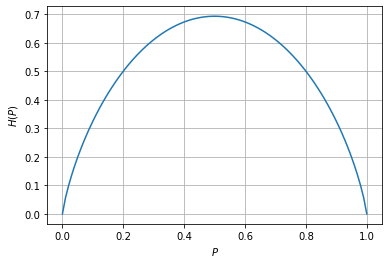

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def entrop(P):
    if P == 0.0 or P == 1.0:
        return 0.0
    else:
        return -P * np.log(P) - (1-P) * np.log(1-P)

fig, ax = plt.subplots()

P = np.linspace(0, 1, 100)
H = [entrop(pi) for pi in P]

ax.plot(P, H)
ax.set_xlabel(r'$P$')
ax.set_ylabel(r'$H(P)$')
ax.grid();

### The Kullback-Leibler divergence

Assume that we have a discrete random variable with $n$ outcomes $x_1$, $x_2$, ... , $x_n$. 

The true probability distribution of these outcomes is known in advance and is $P(x_i)$. 

Assume now that we have built a model of this stochastic process that predicts this distribution as $Q(x_i)$. 

We want to estimate the performance of our model comparing true distribution $P(x_i)$ and the approximated one $Q(x_i)$.

For this purpose the Kullback-Leibler (KL) divergence can be  used. This is also called the relative entropy because  it gives the loss of information if $P$ is modeled
in terms of $Q$: 

$$
D_{KL}(P,Q) = \sum_{i=1}^n P(x_i) 
\log \frac{P(x_i)}{Q(x_i)}
$$

Note that $D_{KL}(P, Q) \geq 0$ with equality if and only if $P=Q$. 

Sometimes Kullback–Leibler divergence is called the Kullback–Leibler distance, but it is not
formally a distance metric because it is asymmetrical in P and Q. 

Here is a simple illustration how this equation works.

Assume that the random variable produces three outcomes with the probabilities 

$$
P_1 = 0.5, P_2 = 0.3, P_3 = 0.2
$$

The first model predicts them as

$$
Q_1 = 0.4, Q_2 = 0.35, Q_3 = 0.25
$$

and the second one produces the distribution

$$
Q_2 = 0.4, Q_2 = 0.4, Q_3 = 0.2
$$

Which one is better?

In [22]:
import numpy as np

def kl_div(P, Q):
    """Kullback–Leibler divergence
    For simplicity we do not check if Pi or Qi are zeros and hope thay are not
    """
    assert len(P) == len(Q)
    assert abs(sum(P)-1) < 1e-10 and abs(sum(Q)-1) < 1e-10
    return sum([p * np.log(p / q) for p, q in zip(P, Q)])
    
P = [0.5, 0.3, 0.2]
Q1 = [0.4, 0.35, 0.25]
Q2 = [0.4, 0.4, 0.2]

print(f"KL for P and Q1 {kl_div(P, Q1):.5f}")
print(f"KL for P and Q2 {kl_div(P, Q2):.5f}")

KL for P and Q1 0.02070
KL for P and Q2 0.02527


We see that the first model is preferable since KL divergence for $Q_1$ and P is less then that for $Q_2$ and $P$.

### Cross entropy

Equation for the Kullback–Leibler divergence can be rewritten as follows:

$$
D_{KL}(P,Q) = \sum_{i=1}^n P(x_i) 
(\log P(x_i) - \log Q(x_i))=
\sum_{i=1}^n P(x_i) \log P(x_i) -
\sum_{i=1}^n P(x_i) \log Q(x_i)
$$

Here we recognize the information entropy

$$
H(P) = -\sum_{i=1}^n P(x_i) \log P(x_i)
$$

The second item of the formula for the KL divergence is
called *the cross entropy*:

$$
H(P,Q) = - \sum_{i=1}^n P(x_i) \log Q(x_i)
$$

Thus we have:

$$
H(P,Q) = D_{KL}(P, Q) + H(P)
$$

Cross entropy of two distributions $P$ and $Q$ differs from KL divergence by an offset $H(P)$.

Let us remember that in these equations we consider $P$ as a given true probability distribution and $Q$ is its approximation. 

Tuning a model we search for the better $Q$ while $P$ remains unchanged. 

Minimizing the cross-entropy with respect to $Q$ is equivalent to minimizing the KL divergence, because $Q$
does not participate in the omitted term $H(P)$.

Reconsider the above example computing now the cross-entropy.

In [23]:
import numpy as np

def cross_ent(P, Q):
    """Cross-entropy"""
    assert len(P) == len(Q)
    assert abs(sum(P)-1) < 1e-10 and abs(sum(Q)-1) < 1e-10
    return sum([-p * np.log(q) for p, q in zip(P, Q)])
    
P = [0.5, 0.3, 0.2]
Q1 = [0.4, 0.35, 0.25]
Q2 = [0.4, 0.4, 0.2]

print(f"Cross-entropy for P and Q1 {cross_ent(P, Q1):.5f}")
print(f"Cross-entropy for P and Q2 {cross_ent(P, Q2):.5f}")

Cross-entropy for P and Q1 1.05035
Cross-entropy for P and Q2 1.05492


### Exercises

5\. A random variable $x$ belongs to the interval between $0$ and $2$ and the probability that $x<x_1$ is proportional to $x_1^2$. Plot its CDF.

6\. In this exercise you have a random variable $x$ that belongs to the interval between 0 and 1 and its PDF is proportional to $x$. Plot the graph of this PDF. Do not forget about its proper normalization.

7\. File "random_words.txt" that you can find at "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/" contains the output of a random word generator. Its outcomes include six different words that are generated at random, one word per line. Write a program that downloads this file, reveals and print the words, and computes the related information entropy.

8\. Using cross-entropy compare two probability distributions 

$$
Q_1 = 0.16, 0.19, 0.17, 0.15, 0.19, 0.14
$$

$$
Q_2 = 0.13, 0.11, 0.14, 0.19, 0.21, 0.22
$$

designed to model rolling the die. Which one approximate the die better?